In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 15, 5
sns.set_style("darkgrid")

In [3]:
customer = pd.read_csv("customers.csv")
customer.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


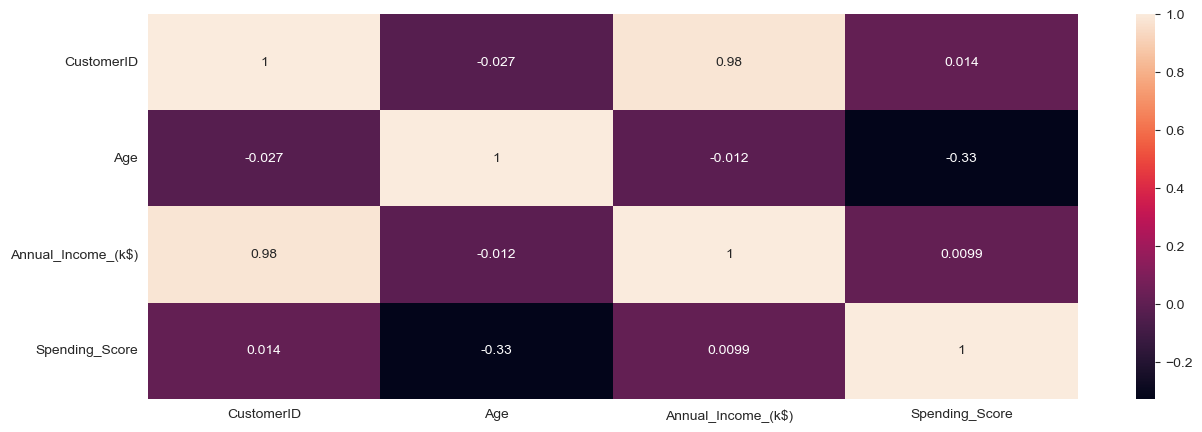

In [29]:
sns.heatmap(customer.corr(), annot=True)
plt.show()

In [9]:
customer.drop_duplicates(inplace=True)

In [19]:
X = customer.iloc[:, [2, 3]].values

c:\Users\casti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


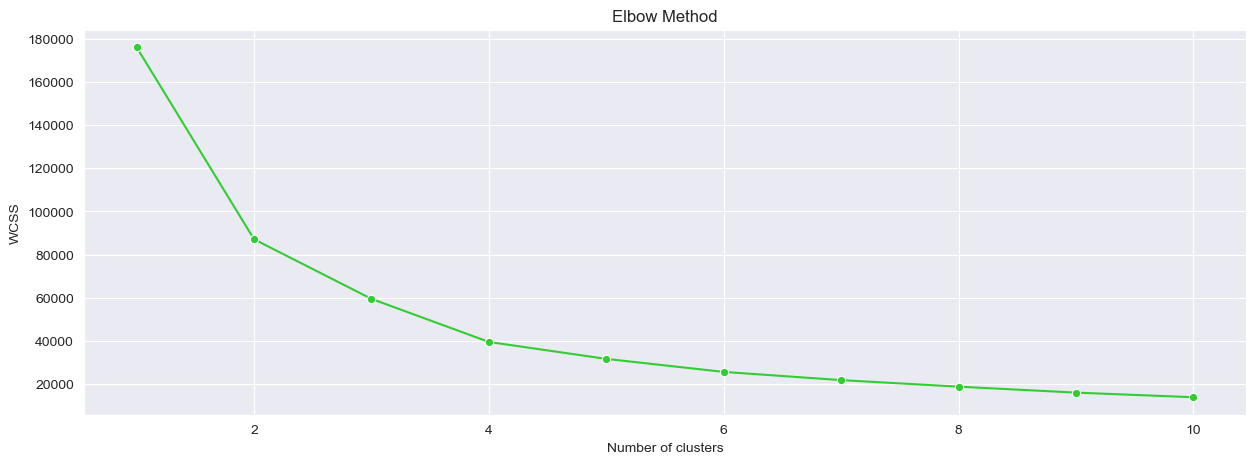

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
sns.lineplot(x = range(1, 11), y = wcss, marker='o', color = 'limegreen')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
y_pred = kmeans.fit_predict(X)

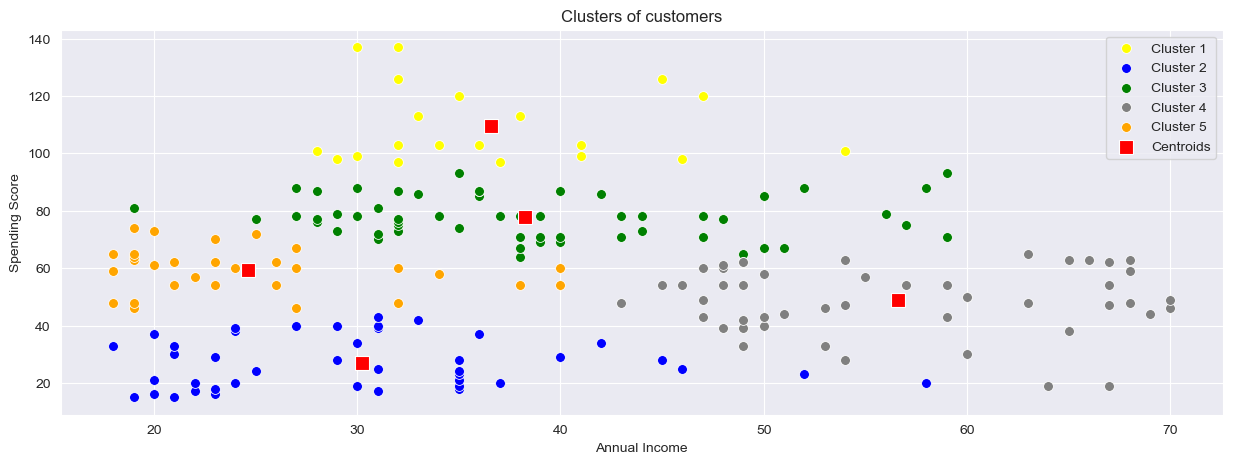

In [23]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [38]:
#different data titanic
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


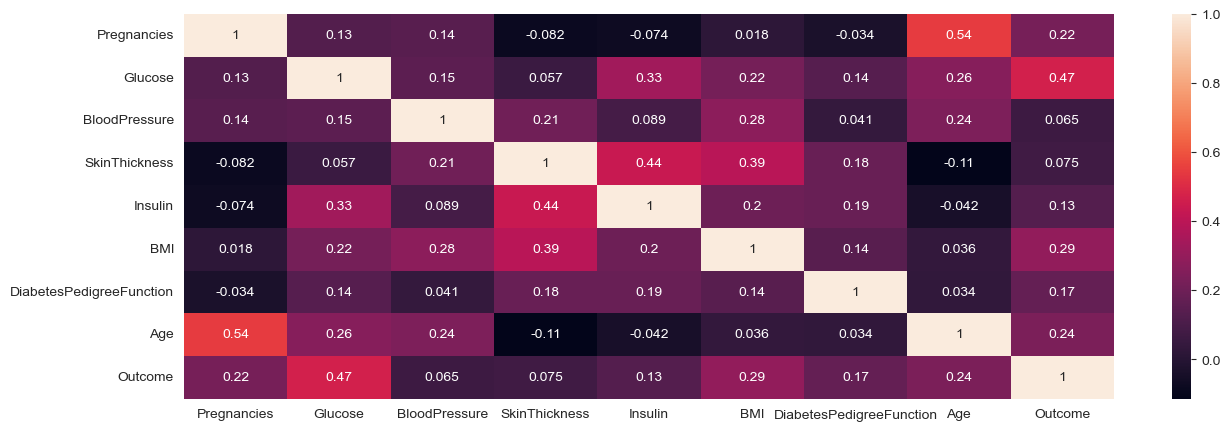

In [41]:
sns.heatmap(diabetes_data.corr(), annot=True)
plt.show()

In [43]:
diabetes_data.drop_duplicates(inplace=True)
X_diabetes = diabetes_data.iloc[:,[2, 3]].values

c:\Users\casti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


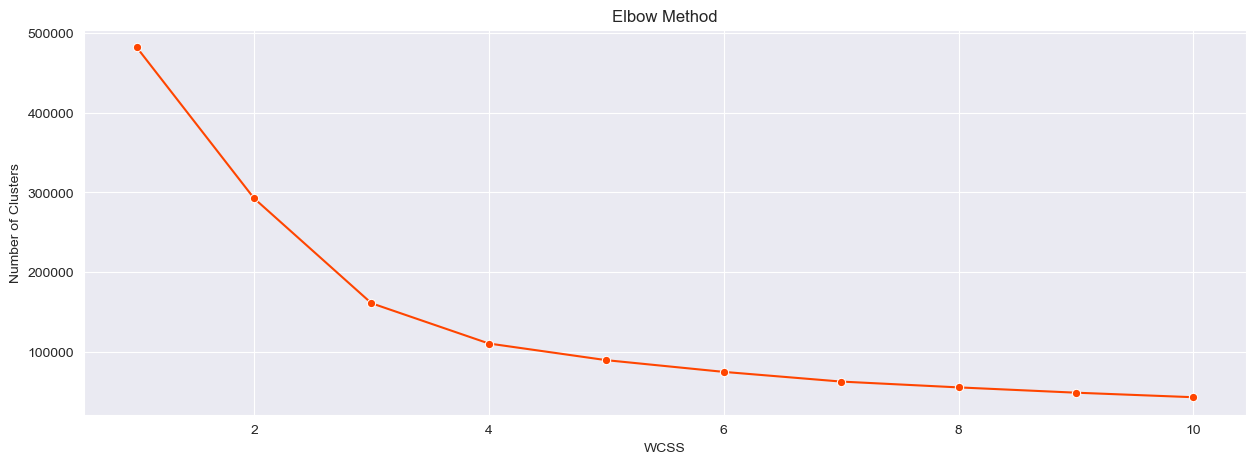

In [49]:
wcss_diabetes = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_diabetes)
    wcss_diabetes.append(kmeans.inertia_)
sns.lineplot(x=range(1,11),y=wcss_diabetes,marker='o', color = "orangered")
plt.title("Elbow Method")
plt.ylabel("Number of Clusters")
plt.xlabel("WCSS")
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X_diabetes)

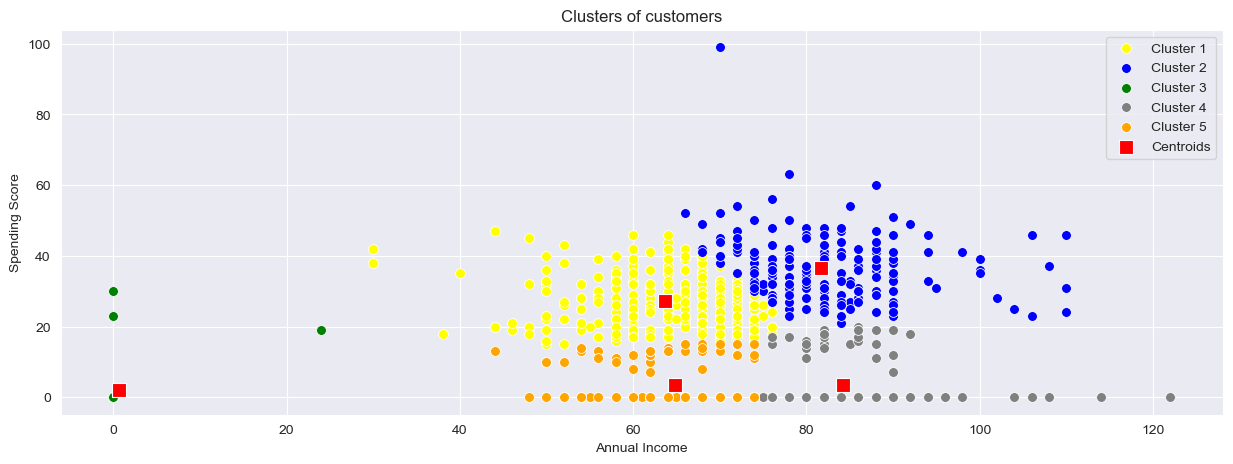

In [51]:
sns.scatterplot(x=X_diabetes[y_pred == 0, 0], y=X_diabetes[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X_diabetes[y_pred == 1, 0], y=X_diabetes[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X_diabetes[y_pred == 2, 0], y=X_diabetes[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X_diabetes[y_pred == 3, 0], y=X_diabetes[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X_diabetes[y_pred == 4, 0], y=X_diabetes[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()